In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [6]:
#To work offline
pyo.init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")

### Read the excel file 

In [7]:
df=pd.read_excel(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\Covid cases in India.xlsx")

In [8]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [9]:
df.drop(['S. No.'],axis=1,inplace=True) #We don't need this column as we have index

In [10]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [11]:
#Let's create a new column Total Cases 
df["Total Cases"] = df["Total Confirmed cases (Indian National)"] + df["Total Confirmed cases ( Foreign National )"]

In [12]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [13]:
overall_cases = df["Total Cases"].sum()
print("The total number of cases in India now is ", overall_cases)

The total number of cases in India now is  729


In [14]:
#Let's add Active Cases as some have cured
df["Active Cases"]=df["Total Cases"]-(df["Death"]+df["Cured"])

In [15]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [16]:
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [17]:
total_cases_now = df.groupby("Name of State / UT")["Total Cases"].sum().sort_values(ascending = False).to_frame()
total_cases_now

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [18]:
total_cases_now.style.background_gradient(cmap = "Reds")

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


### Data Visualization

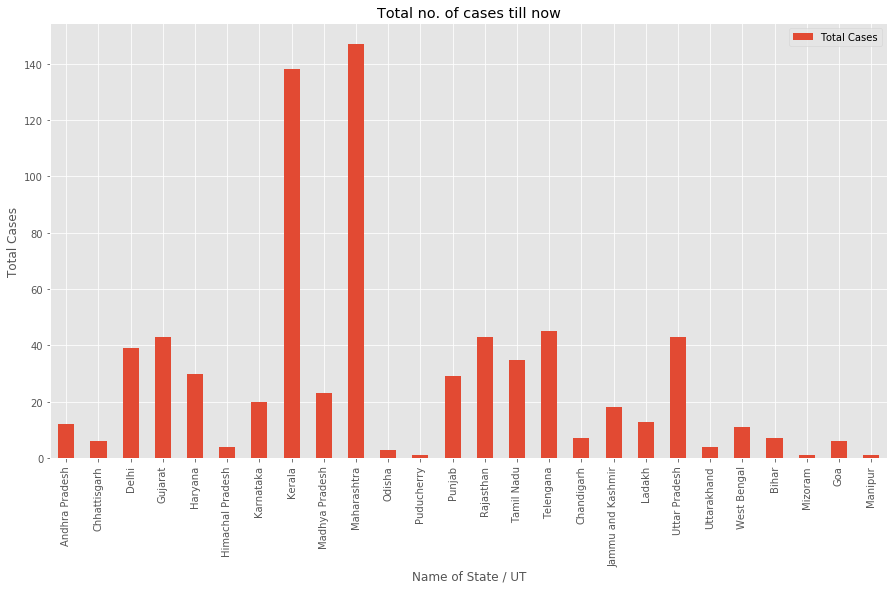

In [19]:
#using pandas
axes = df.plot(kind='bar',x='Name of State / UT',y='Total Cases', figsize = (15, 8), title = "Total no. of cases till now")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()

In [20]:
#plotly
df.iplot(kind = "bar", x="Name of State / UT", y="Total Cases", title = "Total no. cases till now")

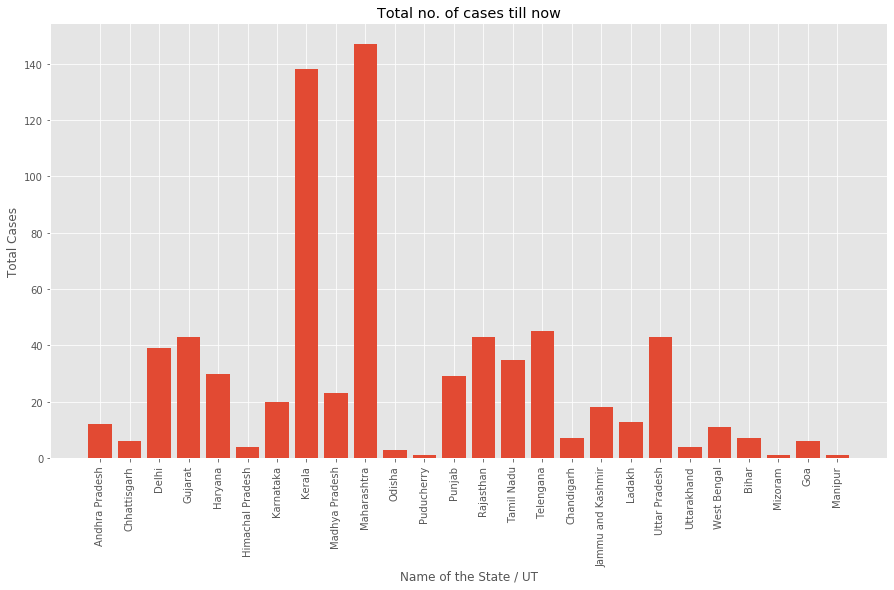

In [21]:
#matplotlib
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(df["Name of State / UT"], df["Total Cases"])
plt.title("Total no. of cases till now")
plt.xlabel("Name of the State / UT")
plt.ylabel("Total Cases")
plt.show() 

In [22]:
#plotly express
px.bar(df,x='Name of State / UT',y='Total Cases', title = "Total no. cases till now")

In [23]:
#we will use plotly for scatter as plotly vis looks good
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='Total cases till now',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=20)
px.scatter(df,x='Name of State / UT',y='Total Cases', title = "Total cases till now")

In [24]:
#plotly object oriented way for vis
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

### Let's merge coordinates dataset with this dataset to explore Folium

In [25]:
indian_cord = pd.read_excel(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\Indian Coordinates.xlsx")

In [26]:
indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [27]:
df_full = pd.merge(indian_cord, df, on = "Name of State / UT")

In [28]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [29]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.6,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)


In [30]:
map

### How corona virus is rising Globaly:

In [31]:
df_India=pd.read_excel(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
df_Italy=pd.read_excel(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
df_Korea=pd.read_excel(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
df_Wuhan=pd.read_excel(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [32]:
df_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [33]:
df_Italy.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


In [34]:
df_Wuhan.head()

,Date,Total Cases,New Cases
0,2020-01-22,444,0
1,2020-01-23,444,0
2,2020-01-24,549,105
3,2020-01-25,761,212
4,2020-01-26,1058,297


In [35]:
df_Korea.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


In [36]:
fig = px.bar(df_India, x = "Date", y = "Total Cases", color = "Total Cases", title = "Confirmed cases in India")
fig.show()

In [37]:
fig=px.bar(df_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(df_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in S.Korea')
fig.show()

fig=px.bar(df_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

In [38]:
df_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [39]:
#bar subplots
from plotly.subplots import make_subplots

In [40]:
fig = make_subplots(rows = 2, cols = 2, specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],subplot_titles = ("India", "Italy", "S.Korea", "Wuhan"))

fig.add_trace(go.Bar(x = df_India["Date"], y = df_India["Total Cases"], marker = dict(color = df_India["Total Cases"], coloraxis = "coloraxis")), 1, 1)
fig.add_trace(go.Bar(x = df_Italy["Date"], y = df_Italy["Total Cases"], marker = dict(color = df_Italy["Total Cases"], coloraxis = "coloraxis")), 1, 2)
fig.add_trace(go.Bar(x = df_Korea["Date"], y = df_Korea["Total Cases"], marker = dict(color = df_Korea["Total Cases"], coloraxis = "coloraxis")), 2, 1)
fig.add_trace(go.Bar(x = df_Wuhan["Date"], y = df_Wuhan["Total Cases"], marker = dict(color = df_Wuhan["Total Cases"], coloraxis = "coloraxis")), 2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title = "Total Cases in 4 countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [41]:
#scatter subplots
fig = make_subplots(rows = 2, cols = 2, specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],subplot_titles = ("India", "Italy", "S.Korea", "Wuhan"))

fig.add_trace(go.Scatter(x = df_India["Date"], y = df_India["Total Cases"], marker = dict(color = df_India["Total Cases"], coloraxis = "coloraxis")), 1, 1)
fig.add_trace(go.Scatter(x = df_Italy["Date"], y = df_Italy["Total Cases"], marker = dict(color = df_Italy["Total Cases"], coloraxis = "coloraxis")), 1, 2)
fig.add_trace(go.Scatter(x = df_Korea["Date"], y = df_Korea["Total Cases"], marker = dict(color = df_Korea["Total Cases"], coloraxis = "coloraxis")), 2, 1)
fig.add_trace(go.Scatter(x = df_Wuhan["Date"], y = df_Wuhan["Total Cases"], marker = dict(color = df_Wuhan["Total Cases"], coloraxis = "coloraxis")), 2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title = "Total Cases in 4 countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

### Worldwide Cases

In [42]:
df=pd.read_csv(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\covid_19_data.csv",parse_dates=['Last Update'])

In [43]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [44]:
df.rename(columns = {"ObservationDate": "Date", 'Country/Region':'Country'}, inplace=True)

In [45]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [46]:
df.groupby("Date").sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [47]:
dff = df.groupby("Date").sum()
dff.style.background_gradient(cmap = "Reds")

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555,17,28
01/23/2020,2829,653,18,30
01/24/2020,4305,941,26,36
01/25/2020,6490,1438,42,39
01/26/2020,9071,2118,56,52
01/27/2020,12342,2927,82,61
01/28/2020,15262,5578,131,107
01/29/2020,18711,6165,133,126
01/30/2020,23345,8235,171,143


In [48]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [49]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))


In [50]:
df_confirmed=pd.read_csv(r"C:\Users\Harsh\Documents\Downloads\COVID-19-Data-Analyisis-master\time_series_covid_19_confirmed.csv")

In [51]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [52]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [53]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [61]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


In [55]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})